Epoch: 0050 cost= 0.081068210 W= 0.285487 b= 0.54325
Epoch: 0100 cost= 0.080594622 W= 0.283353 b= 0.558607
Epoch: 0150 cost= 0.080175862 W= 0.281345 b= 0.573052
Epoch: 0200 cost= 0.079805583 W= 0.279456 b= 0.586638
Epoch: 0250 cost= 0.079478167 W= 0.27768 b= 0.599417
Epoch: 0300 cost= 0.079188712 W= 0.276009 b= 0.611435
Epoch: 0350 cost= 0.078932844 W= 0.274438 b= 0.622737
Epoch: 0400 cost= 0.078706674 W= 0.272961 b= 0.633365
Epoch: 0450 cost= 0.078506701 W= 0.271571 b= 0.643363
Epoch: 0500 cost= 0.078329943 W= 0.270264 b= 0.652765
Epoch: 0550 cost= 0.078173645 W= 0.269035 b= 0.661608
Epoch: 0600 cost= 0.078035526 W= 0.267879 b= 0.669926
Epoch: 0650 cost= 0.077913418 W= 0.266791 b= 0.677748
Epoch: 0700 cost= 0.077805519 W= 0.265768 b= 0.685106
Epoch: 0750 cost= 0.077710114 W= 0.264806 b= 0.692026
Epoch: 0800 cost= 0.077625833 W= 0.263902 b= 0.698535
Epoch: 0850 cost= 0.077551350 W= 0.263051 b= 0.704657
Epoch: 0900 cost= 0.077485517 W= 0.26225 b= 0.710415
Epoch: 0950 cost= 0.077427350 W

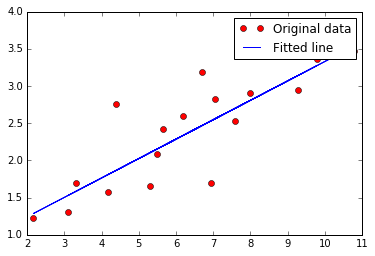

Testing... (Mean square loss Comparison)
Testing cost= 0.077319
Absolute mean square loss difference: 5.70044e-05


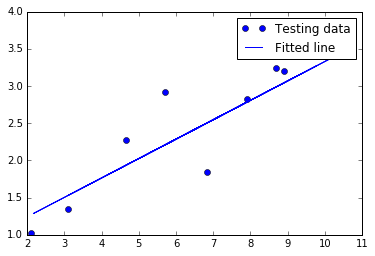

In [63]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()